In [1]:
# Character Match-up percentages

import smasharchive, smashplots

db = smasharchive.smashdb()
db.tournament_name_skip['kansai'] = 0
db.refilter_archive()
db.refilter_archive_for_ssbcentral(threshold=10)

print("")
len(db.player_rankings)

char1 = 'yoshi'
char2 = 'falcon'

data_matrix = db.print_char_mu( set( [char1, char2] ) )

print("{}".format(len(data_matrix)))

import collections
import numpy
data_matrix = numpy.array(data_matrix)
winchars = collections.Counter( [ x for x in data_matrix[:, 5] ] )
#print(winchars)

initiatlizing smashdb

Tournament   Year  Round Winner             Loser              Winner   Loser    W-rating L-rating
genesis 3    2016  top16 tacos              superboomfan       yoshi    falcon      8.880    9.920
genesis 3    2016  pools fireblaster        nothing            yoshi    falcon      7.480    4.900
genesis 3    2016  pools fireblaster        nothing            yoshi    falcon      7.480    4.900
genesis 3    2016  pools fireblaster        lordnarwhal        yoshi    falcon      7.480    6.990
snosa2       2016  top32 janitor            tacos              falcon   yoshi       5.330    8.880
snosa2       2016  top32 tacos              janitor            yoshi    falcon      8.880    5.330
snosa2       2016  top16 tacos              kerokeroppi        yoshi    falcon      8.880    8.860
snosa2       2016  top16 tacos              kerokeroppi        yoshi    falcon      8.880    8.860
ssc          2016  top64 zero               prince             falcon   yoshi       7.

In [2]:
import matplotlib.pyplot as plt

print(data_matrix[0,:])

winner_ratings = [ float(x) for x in data_matrix[:, 7] ]
loser_ratings = [ float(x) for x in data_matrix[:, 8] ]

# indices when char1 wins; when char 2 wins
temp_winnerlist = data_matrix[:,5]
char1_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char1]
char2_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char2]

['genesis 3' '2016' 'top16' 'tacos' 'superboomfan' 'yoshi' 'falcon' '8.88'
 '9.92']


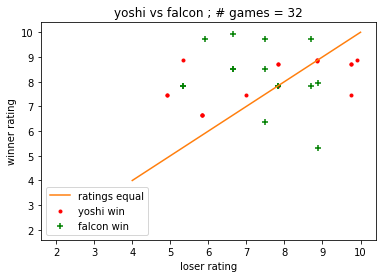

In [3]:
plt.clf()
plt.scatter( [loser_ratings[j] for j in char1_indices], [ winner_ratings[j] for j in char1_indices], marker='.', color='red', label=char1 +' win')
plt.scatter( [loser_ratings[j] for j in char2_indices], [ winner_ratings[j] for j in char2_indices], marker='+', color='green', label=char2 + ' win')
plt.plot( [2], [2])
plt.plot( [4,10], [4,10], label='ratings equal' )
plt.title("{} vs {} ; # games = {}".format(char1, char2, len(winner_ratings)))
plt.ylabel("winner rating")
plt.xlabel("loser rating")
plt.legend(loc='lower left')
plt.show()

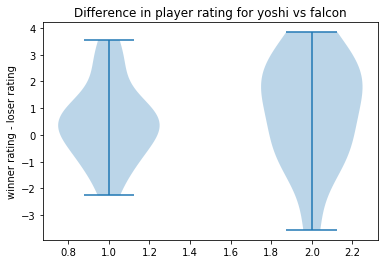

In [4]:
char1_win_rating_diffs = [ (winner_ratings[idx] - loser_ratings[idx]) for idx in char1_indices ]
char2_win_rating_diffs = [ (winner_ratings[idx] - loser_ratings[idx]) for idx in char2_indices ]

# for idx in char1_indices:
#     diff = winner_ratings[idx] - loser_ratings[idx]
#     print( "{:5.15f}  {:5.15f}  {}".format(winner_ratings[idx], loser_ratings[idx], diff))

    
plt.clf()
plt.violinplot( [char1_win_rating_diffs, char2_win_rating_diffs])#, labels = [char1 + ' wins', char2 + ' wins'] )
plt.title("Difference in player rating for {} vs {}".format(char1, char2))
plt.ylabel("winner rating - loser rating")

plt.show()

In [5]:
import collections

plt.clf()

plt.hist(char1_win_rating_diffs, alpha=0.5, label='{} wins; {}'.format(char1, len(char1_win_rating_diffs)))
plt.hist(char2_win_rating_diffs, alpha=0.5, label='{} wins; {}'.format(char2, len(char2_win_rating_diffs)))
plt.legend(loc='upper left')
plt.title("Games between ssbcentral-rated players")
plt.ylabel("Number of wins")
plt.xlabel("Difference between winner rating and loser rating")
#plt.show()
plt.rcParams["figure.figsize"] = [2.5,3.5]
plt.savefig('rated-mu-analysis-{}-{}.png'.format(char1, char2), dpi=200)

Current size: [2.5, 3.5]


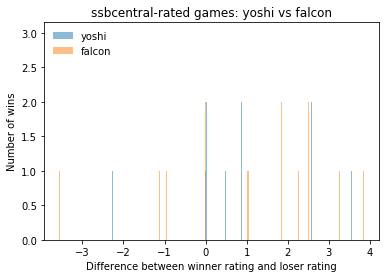

In [6]:
import collections

plt.clf()

char1rates, char1counts = zip(*[ (x,y) for x,y in collections.Counter(char1_win_rating_diffs).items() ])
char2rates, char2counts = zip(*[ (x,y) for x,y in collections.Counter(char2_win_rating_diffs).items() ])

plt.bar(char1rates, char1counts, alpha=0.5, width=0.015, label=char1)# label='{} wins; {}'.format(char1, len(char1_win_rating_diffs)))
plt.bar(char2rates, char2counts, alpha=0.5, width=0.015, label=char2)#
plt.legend(loc='upper left', frameon=False)
plt.title("ssbcentral-rated games: {} vs {}".format(char1, char2))
plt.ylabel("Number of wins")
plt.xlabel("Difference between winner rating and loser rating")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size: {}".format(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show()
